In [20]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from IPython.display import display

In [21]:
# 2.1 Load article metadata
news = pd.read_csv(
    '../data/news.tsv/news.tsv',
    sep='\t',
    header=None,
    names=['newsID','category','subcategory','title','abstract','url','entities','abstract_entities'],
    dtype=str
)

# 2.2 Drop rows missing title/abstract
news = news.dropna(subset=['title','abstract']).reset_index(drop=True)

# 2.3 Load similarity scores
with open('../results/similarity_scores.pkl','rb') as f:
    similarities = pickle.load(f)

# Align size if needed
if len(similarities) != len(news):
    print(f"Warning: similarity length = {len(similarities)}; news rows = {len(news)}. Aligning to smaller size.")
    min_len = min(len(similarities), len(news))
    similarities = similarities[:min_len]
    news = news.iloc[:min_len].reset_index(drop=True)

# Attach similarity scores to news DataFrame
news['similarity'] = similarities

In [22]:
N = 10  # number of recommendations
top_n = news.sort_values('similarity', ascending=False).head(N)

# Save to CSV
out_path = '../results/sample_recommendations.csv'
top_n[['newsID','title','similarity']].to_csv(out_path, index=False)
print(f"Saved top {N} recommendations to {out_path}")

Saved top 10 recommendations to ../results/sample_recommendations.csv


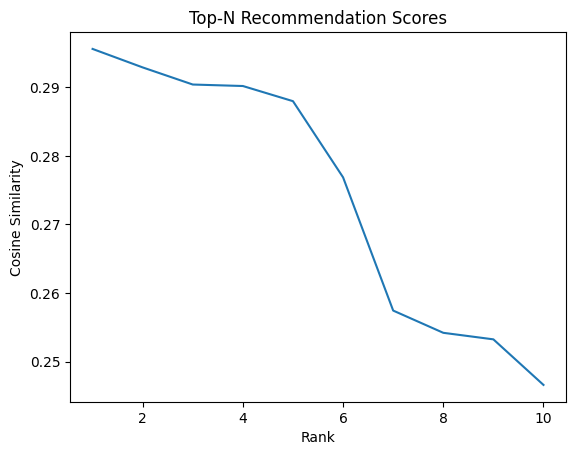

In [23]:
plt.figure()
plt.plot(range(1, N+1), top_n['similarity'])
plt.xlabel('Rank')
plt.ylabel('Cosine Similarity')
plt.title('Top-N Recommendation Scores')
plt.show()

In [24]:
# Show title, abstract, and URL for each recommendation
display(top_n[['title','abstract','url']])

,title,abstract,url
18377,Everything We Know About Dinosaur Evolution Ju...,Elements is more than just a science show. It'...,https://assets.msn.com/labs/mind/AAJGj3g.html
12442,This Arctic Expedition Is Freezing a Ship for ...,Elements is more than just a science show. It'...,https://assets.msn.com/labs/mind/AAISxKy.html
5878,Scientists just witnessed the birth of a heavy...,Elements is more than just a science show. It'...,https://assets.msn.com/labs/mind/AAJWuFT.html
28043,Falling Atoms Are Helping NASA Measure Earth's...,Elements is more than just a science show. It'...,https://assets.msn.com/labs/mind/AAJkO1o.html
31088,Could Ocean Cleanup's New Interceptor Help Sol...,Elements is more than just a science show. It'...,https://assets.msn.com/labs/mind/BBWt3zs.html
21864,"Azure goes Quantum at Microsoft Ignite 2019, a...",Microsoft CEO Satya Nadella emphasized the imp...,https://assets.msn.com/labs/mind/AAJOReL.html
9679,Scientists and researchers reveal 13 dark tech...,"AI, drones, and self-driving vehicles raise ma...",https://assets.msn.com/labs/mind/AAJBDsq.html
12694,"Why scientists are so excited about ""quantum s...","With a quantum computer, scientists are dippin...",https://assets.msn.com/labs/mind/AAJmUf5.html
4924,"For girls in science, the time is now","Programs in science, technology, engineering, ...",https://assets.msn.com/labs/mind/AAIONIp.html
46674,Microsoft AI helps diagnose cervical cancer fa...,"In some cases, AI-assisted cancer detection mi...",https://assets.msn.com/labs/mind/BBWyHwV.html
